In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np



In [30]:
df = pd.read_csv('haberman.csv')
df = df.rename(columns={'30': 'age','64':'year','1':'nodes','1.1':'status'})
df

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [11]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Three Features or Independent-variables:

age: Patient's age.

year: year of surgery.

nodes: Total number of axillary nodes affected/infected by cancer.

One Label or Class:

status: Survival status of patients = {1, 2}.
status value 1 represents patient survived 5 years or longer after the surgery.
status value 2 represents patient died within 5 years of surgery.

when status is 1 surgery is effective 

when status is 2 surgery is ineffective

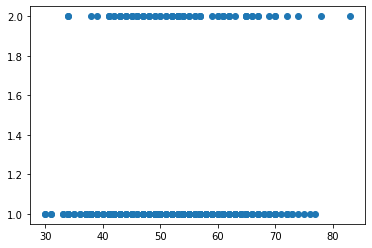

In [10]:
plt.scatter(x=df[['age']],y=df[['status']])
plt.show()

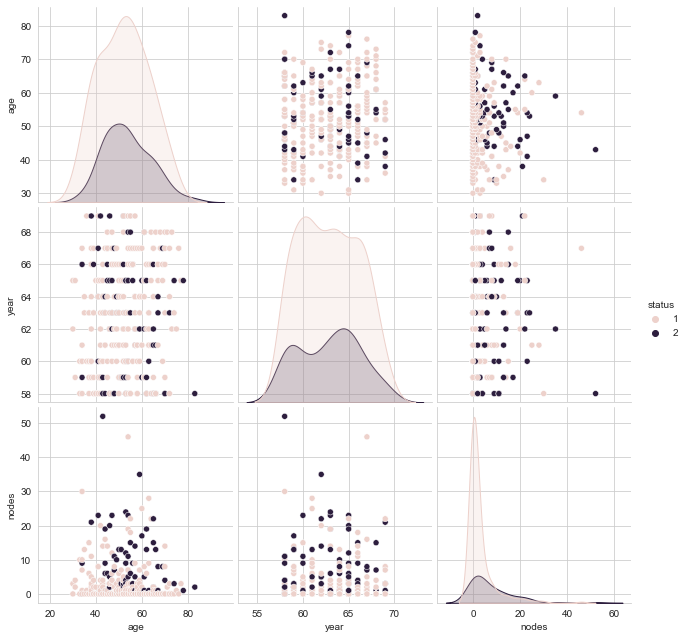

In [12]:
# pair plot 
features=['age', 'year', 'nodes', 'status']
sns.set_style('whitegrid')
sns.pairplot(df[features],hue='status',height=3)
plt.show()

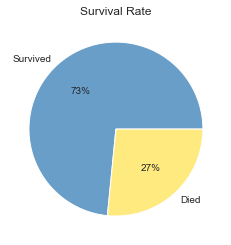

In [13]:
slices = df["status"].value_counts()

plt.pie(x=slices, labels=["Survived", "Died"], colors=["#699ec9", "#ffea80"], autopct="%1.0f%%")
plt.title("Survival Rate")
plt.savefig("01. Survival rate.png")

plt.show()

Observations

From total 305 data-points, 224 data-points belong to class Survived and 81 data-points belong to class Died.



In [14]:
df.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


patient with lowest age 30 

patient with highest age 83

mean age 52


In [15]:
df[['age']].median()

age    52.0
dtype: float64

median age of patient 52

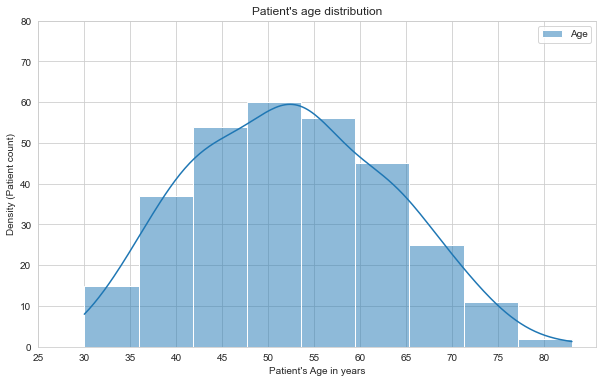

In [21]:
# plot a histogram using age feature 

plt.figure(figsize=(10, 6))  # Figure size: width, height

sns.histplot(x=df["age"], label="Age", bins=9, kde=True)
plt.xlabel("Patient's Age in years")
plt.ylabel("Density (Patient count)")
plt.title("Patient's age distribution")
plt.xticks(ticks=range(25, 85, 5))
plt.yticks(ticks=range(0, 90, 10))
plt.legend()

plt.show()

it is a normal distribution as mean and median as 52 years

majority of age is distributes between 45 and 65

common age of people who undergone surgery is b/w 45 and 65 

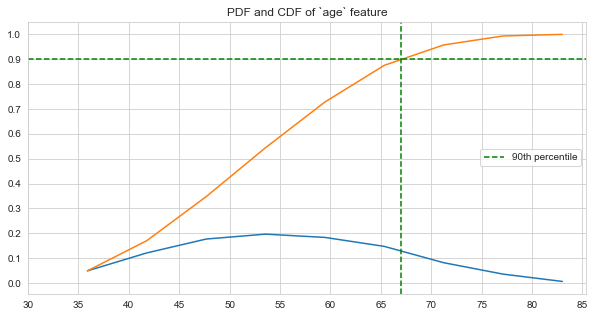

In [22]:
counts, bin_edges = np.histogram(df["age"], bins=9, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)

plt.figure(figsize=(10, 5))

plt.title("PDF and CDF of `age` feature")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xticks(ticks=range(30, 90, 5))
plt.yticks(ticks=np.arange(0.0, 1.1, 0.1))

nth_per = np.percentile(df["age"], 90)
plt.axvline(nth_per, linestyle="--", color="g", label="90th percentile")
plt.axhline(0.9, linestyle="--", color="g")
plt.legend(loc="center right")

plt.savefig("03. PDF and CDF of `age` feature.png")
plt.show()

CDF indicated how much percentage of data points are below certain value 

eg : 90 percent of people who undergo surgery is below 67 years of age 

    50 percent patients undergoe surgery is below 52 years old

In [29]:
bin_edges[9]

83.0